# Testing Feedforward Neural Network using TensorFlow


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from Model import create_model

2023-04-07 03:46:37.814796: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Basic Test (If sum of `N` random numbers between 0 - 1 is greater than `N / 2`)


**Creating Testing/Training data**


In [2]:
NPL = [4, 10, 10, 10, 1]
TRAINING_EXAMPLES = 5000
TESTING_EXAMPLES = 1000

train_X = np.random.random(size=(TRAINING_EXAMPLES, NPL[0]))
train_y = (train_X.sum(1, keepdims=True) > (NPL[0] / 2)).astype(float)

test_X = np.random.random(size=(TESTING_EXAMPLES, NPL[0]))
test_y = (test_X.sum(1, keepdims=True) > (NPL[0] / 2)).astype(float)


**Creating Model**


In [3]:
model = create_model(NPL)
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.3),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=["accuracy"],
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 10)                50        
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


**Training Model**


In [4]:
history = model.fit(train_X, train_y, epochs=10)

Epoch 1/10
157/157 [==============================] - 1s 1ms/step - loss: 0.2512 - accuracy: 0.4892
Epoch 2/10
157/157 [==============================] - 0s 923us/step - loss: 0.2512 - accuracy: 0.4876
Epoch 3/10
157/157 [==============================] - 0s 904us/step - loss: 0.2513 - accuracy: 0.4796
Epoch 4/10
157/157 [==============================] - 0s 896us/step - loss: 0.2508 - accuracy: 0.4928
Epoch 5/10
157/157 [==============================] - 0s 890us/step - loss: 0.2509 - accuracy: 0.5004
Epoch 6/10
157/157 [==============================] - 0s 894us/step - loss: 0.2509 - accuracy: 0.4970
Epoch 7/10
157/157 [==============================] - 0s 1ms/step - loss: 0.2502 - accuracy: 0.5110
Epoch 8/10
157/157 [==============================] - 0s 899us/step - loss: 0.2504 - accuracy: 0.5126
Epoch 9/10
157/157 [==============================] - 0s 896us/step - loss: 0.2507 - accuracy: 0.4998
Epoch 10/10
157/157 [==============================] - 0s 998us/step - loss: 0.2507 - 

**Testing Model**


In [7]:
results = model.evaluate(test_X, test_y)
print(f"Test loss: {results[0]}, Test accuracy: {results[1]}")

32/32 [==============================] - 0s 1ms/step - loss: 0.2505 - accuracy: 0.4990
Test loss: 0.25054773688316345, Test accuracy: 0.49900001287460327


In [18]:
TEST_EXAMPLE = 23

# prediction = model.predict()

test_X[:TEST_EXAMPLE].shape

(23, 4)

**Plotting Training History**


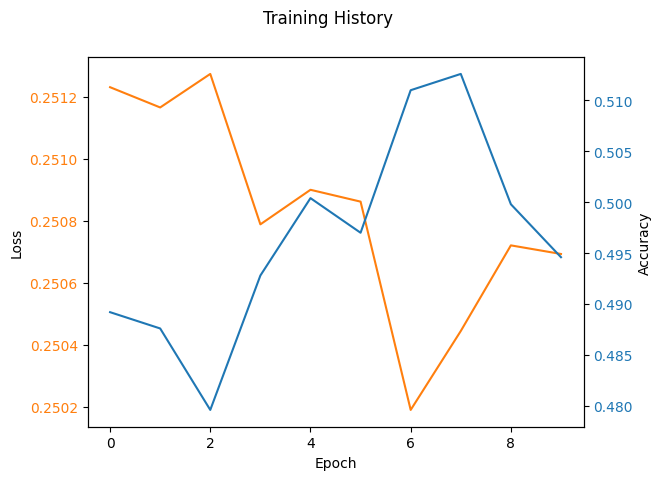

In [11]:
fig, ax1 = plt.subplots()
fig.suptitle("Training History")

ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.plot(history.history["loss"], color="tab:orange")
ax1.tick_params(axis="y", labelcolor="tab:orange")

ax2 = ax1.twinx()

ax2.set_ylabel("Accuracy")
ax2.plot(history.history["accuracy"], color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

plt.show()
